In [243]:
import numpy as np
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy.stats import norm
import math
import statistics
from scipy.optimize import fsolve
##plt.rcParams['text.usetex'] = False

import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['font.family'] = 'serif'

In [244]:
################################################
#### DEFINE GAUSSIAN FUNCTIONS
################################################

## Gaussian function
def Gaussian(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))


## Get counts and bincenters from histogram (bincenters later to be used as x values for Gaussian)
def Gaussian_counts_bincenters(x, bins):
    counts, bin_edges = np.histogram(x, bins=bins, density = True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2 
    return [counts, bin_centers]

    
## Get Gaussian params - mu and sigma
def Gaussian_params(x, bins):
    counts, bin_centers = Gaussian_counts_bincenters(x, bins)
    p0 = [np.mean(x), np.std(x)]  # Initial guess for the parameters
    params, cov = curve_fit(Gaussian, bin_centers, counts, p0=p0)
    return params 

In [245]:
#####################
##FIND M DARK MATTER HALO VALUE FROM M STELLAR
########################

#ELVES. IV. The Satellite Stellar-to-halo Mass Relation Beyond the Milky Way
# Values and equation from Shany's paper - section 4.2, eq 1

## Equation from Shany's paper
def logMstellar_eq(logMhalo):
    M1 = 11.889
    alpha = 2.1
    beta = 0.464
    epsilon = -1.432
    loggamma = -0.812
    gamma = 10**loggamma
    delta = 0.319
    x = np.log10(10**logMhalo/10**M1)
    logMstellar = epsilon + M1 - np.log10(10**(-alpha*x) + 10**(-beta*x)) + gamma*np.exp(-0.5*(x/delta)**2)
    return logMstellar

## Solve for Mhalo value for given Mstellar value (solve y(x) eq for x value)
def logMhalo_eq (logMstellar):
    func = lambda x: logMstellar_eq(x) - logMstellar  ## def f(x) = 0
    logMhalo_guess = 12
    logMhalo = fsolve(func, logMhalo_guess) ##returns roots of func
    return(logMhalo)


### STNDARD DEVIATION
def std_eq (logMhalo):
    sigma0 = 0.02
    nu = -0.47
    M1 = 11.889
    logsigma = sigma0 + nu * (logMhalo - M1)
    return (logsigma)

In [246]:
#####################
##FIND Re VALUE FROM M STELLAR
########################

# Structures of Dwarf Satellites of Milky Way-like Galaxies: Morphology, Scaling Relations, and Intrinsic Shapes
# Eq 5 section 3.5

def logRe_eq (logMstellar):
    a = 1.077
    b = 0.246
    logRe = a + b*logMstellar
    return logRe

sigmaRe = 0.181

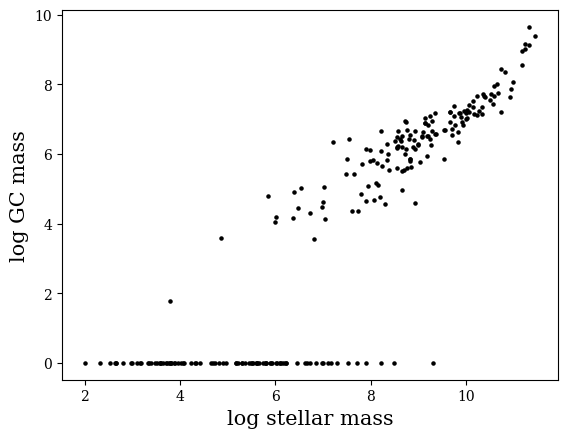

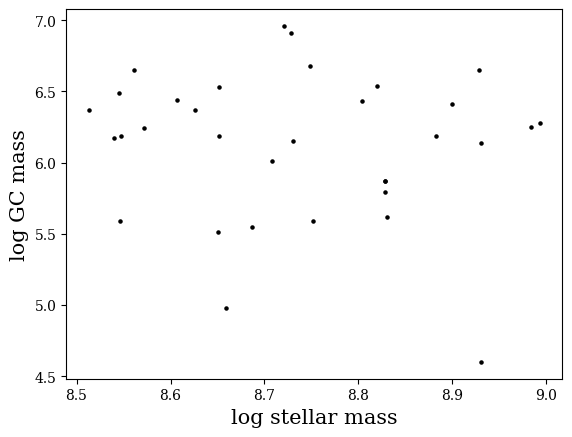

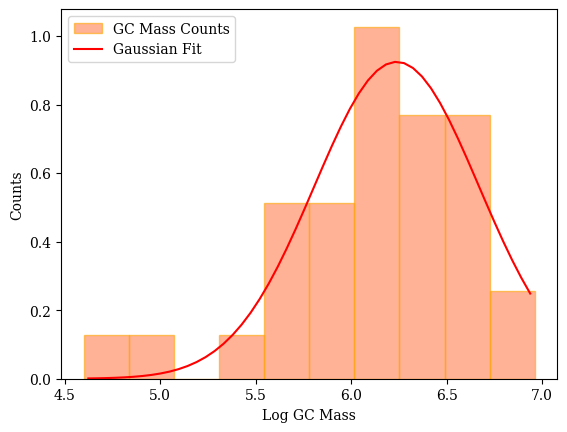

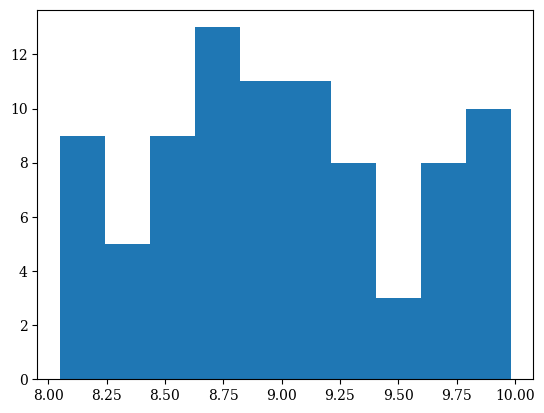

In [247]:
################################################
## GC MASS
################################################

## data that Shany sent on slack  
## from Clearing the Hurdle: The Mass of Globular Cluster Systems as a Function of Host Galaxy Mass
## Gwendolyn M. Eadie et al 2022 ApJ 926 162

dataGC = np.genfromtxt('best_sample.txt', skip_header=1, delimiter=',')
M_GC = dataGC[:, 2] # log GC Mass (in solar masses)
M_S = dataGC[:, 4] #log Stellar Mass


###plot a scatter plot of said data
plt.scatter(M_S, M_GC, s=5, color = 'black')  ## Mgc or Mgc/Ms????
plt.xlabel('log stellar mass', fontsize=15)
plt.ylabel('log GC mass', fontsize=15)
plt.show()


################# VERTICAL STRIPE #################

### choose a range of stellar masses to isolate a vertical 'stripe from data'

def Stripe_bounds(MStellar):
    if 8.5 <= MStellar <= 9:
        lbound = 8.5
        ubound = 9
        histbins = 10
    elif 9 < MStellar <= 10.5:
        lbound = 9
        ubound = 10.5
        histbins = 12 #??
    elif 7 <= MStellar < 8.5:
        lbound = 7
        ubound = 10.5
        histbins = 12
    return(lbound, ubound, histbins)

lbound, ubound, histbins = Stripe_bounds(8.7)

## get stellar and GC masses within stripe
def GC_stripe_func (M_GC, M_S, lbound, ubound):
    M_GCstripe = [] 
    M_Sstripe = []
    n = len(M_GC)
    for i in range (n):
        if M_S[i] >= lbound and M_S[i] <= ubound and M_GC[i]!=0:
            M_GCstripe.append(M_GC[i])
            M_Sstripe.append(M_S[i])
    return [M_GCstripe, M_Sstripe]

M_GCstripe, M_Sstripe = GC_stripe_func (M_GC, M_S, lbound, ubound)
        
plt.scatter(M_Sstripe, M_GCstripe, s=5, color='black')
plt.xlabel('log stellar mass', fontsize=15)
plt.ylabel('log GC mass', fontsize=15)
plt.show()


################### DISTRIBUTION #################


plt.hist(M_GCstripe, histbins, alpha=0.6, label='GC Mass Counts', color='coral', edgecolor='orange', density = True)

params = Gaussian_params(M_GCstripe, bins=10) ## best fit params for if GC masses were split into 10 bins 
curve_bin_centers = Gaussian_counts_bincenters(M_GCstripe, 50)[1] ## get bin centers for if historgram of GC masses was split into 50 bins - will be used as x values for gaussian curve


plt.plot(curve_bin_centers, Gaussian(curve_bin_centers, *params), 'r-', label='Gaussian Fit')
plt.xlabel('Log GC Mass')
plt.ylabel('Counts')
plt.legend()
plt.show()





############ Stellar Mass hist #####
#lbound, ubound, histbins = Stripe_bounds(Mstellar)
M_GCstripe, M_Sstripe = GC_stripe_func (M_GC, M_S, 8, 10)
plt.figure()
plt.hist(M_Sstripe, bins = 10)
plt.show()

[11.20296399]


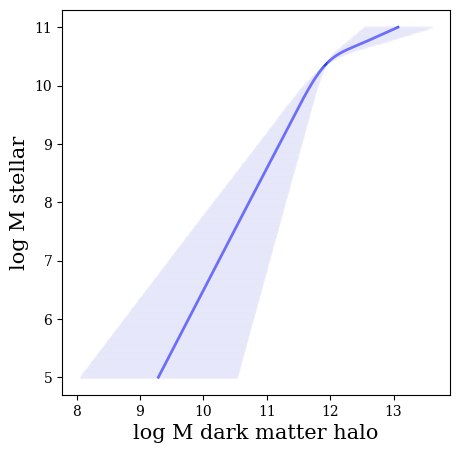

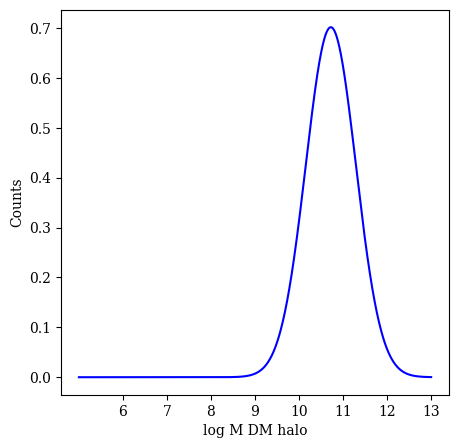

In [248]:
################################################
## DARK MATTER HALO MASS
################################################

logMstellar = 9
logMhalo = logMhalo_eq(logMstellar)
print(logMhalo)


########### DISTRIBUTION #########################
Mstellar = np.logspace(5, 11, 500, base=10)
logMstellar = np.log10(Mstellar)
mean_Mhalos = [] ## M halos for these stellar values
logsigmas = []  ## standard deviations for these M halo values

for i in range (len(logMstellar)):
    logMhalo = logMhalo_eq(logMstellar[i])
    mean_Mhalos.extend (logMhalo) ## gives value of mean halos (not log)
    logsigmas.extend(abs(std_eq(logMhalo)))
    
plt.figure(figsize=(5,5))
plt.plot(mean_Mhalos, logMstellar)
plt.errorbar(mean_Mhalos, logMstellar, xerr = logsigmas, color = 'blue', linewidth = 2, ecolor='lavender', alpha = 0.5)
plt.xlabel('log M dark matter halo', size = 15)
plt.ylabel('log M stellar', size = 15)
plt.xticks(np.linspace(8, 13, 6))
plt.show()



##########PLOT GAUSSIAN FOR GIVEN M STELLAR #######################

logMstellar = 8
plt.figure(figsize=(5,5))
mu = logMhalo_eq(logMstellar)  ##log
sigma = std_eq(mu)  ##log

Mhalos = np.linspace(5, 13, 1000) # Generate x values
gaus = Gaussian(Mhalos, mu, sigma)  # Generate y values

# Plot the Gaussian function
plt.plot(Mhalos, gaus, 'b')
plt.xlabel('log M DM halo')
plt.ylabel('Counts')
plt.xticks(np.linspace(6, 13, 8))
plt.show()



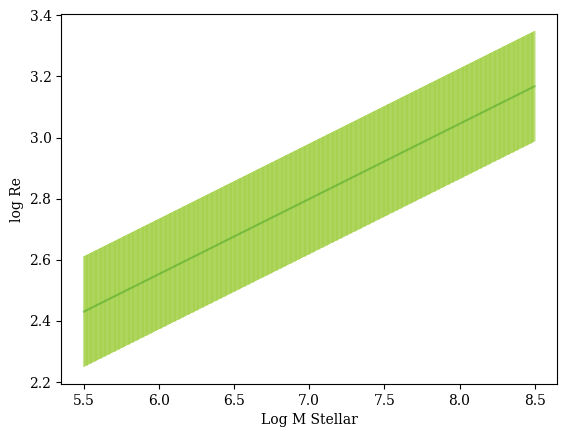

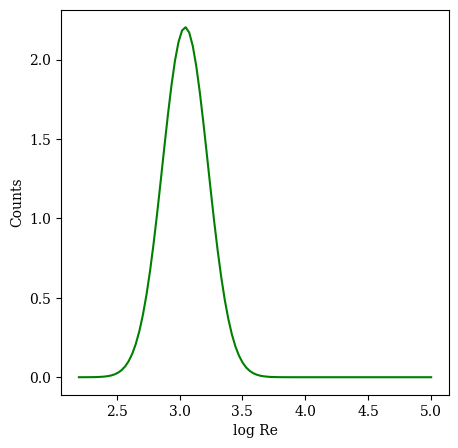

In [249]:
################################################
## Re
################################################

# Structures of Dwarf Satellites of Milky Way-like Galaxies: Morphology, Scaling Relations, and Intrinsic Shapes
# dwarves in mass range 5.5 < M < 8.5


## Plot of Re for range of Stellar values 
logMstellar = np.linspace(5.5, 8.5, 1000)
Re = logRe_eq(logMstellar)
plt.errorbar(logMstellar, Re, yerr = sigmaRe, color = 'green', ecolor = 'yellowgreen', alpha = 0.3)
plt.xlabel('Log M Stellar')
plt.ylabel('log Re')
plt.show


########## Plot Gaussian ##########
logMstellar = 8 
mu = logRe_eq(logMstellar)  ## mean value of Re (from paper) for a given stellar mass
logRe = np.linspace(2.2, 5, 100) # Generate x values ie Re values
gaus = Gaussian(logRe, mu, sigmaRe)  # Gaussian for list of Re values

# Plot the Gaussian function
plt.figure(figsize=(5,5))
plt.plot(logRe, gaus, 'g')
plt.xlabel('log Re')
plt.ylabel('Counts')
#plt.xticks(np.linspace(6, 13, 8))
plt.show()

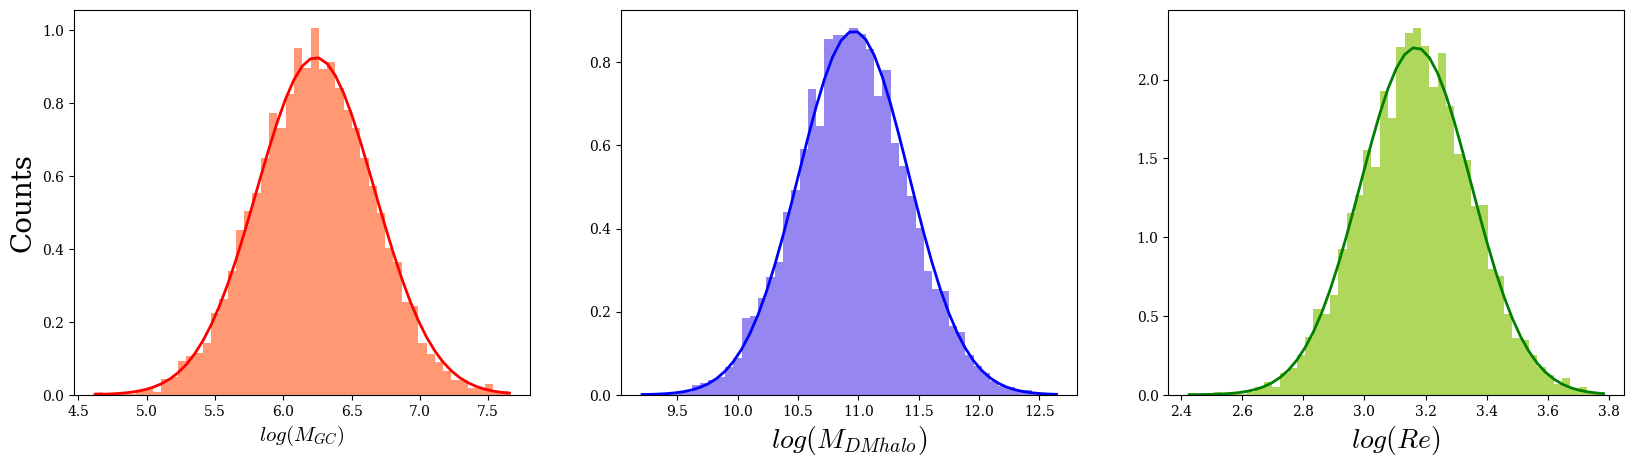

In [250]:
#####################   SAMPLING MASSES FROM DISTRIBUTION ############################    
##sampling GC Mass for a given Stellar Mass
logMstellar = 8.5
n = 5000


lbound, ubound, histbins = Stripe_bounds(logMstellar)
M_GCstripe, M_Sstripe = GC_stripe_func (M_GC, M_S, lbound, ubound)

muGC, sigmaGC = Gaussian_params(M_GCstripe, bins=10)
def GC_random_sample (M_GCstripe, n):
    mu, sigma = Gaussian_params(M_GCstripe, bins=10)
    sample_masses = np.random.normal(mu, sigma, n)
    return sample_masses



############## SAMPLE MASSES FROM DISTRIBUTION ##############################
##### Sampling DM Halo mass

def DM_random_sample (logMstellar, n):
    mu = logMhalo_eq(logMstellar)  ##log
    sigma = std_eq(mu)  ##log
    sample_masses = np.random.normal(mu, sigma, n)
    return (sample_masses)

muDM = logMhalo_eq(logMstellar)  ##log
sigmaDM = std_eq(muDM) 



#####################   SAMPLING MASSES FROM DISTRIBUTION ############################    
##sampling GC Mass for a given Stellar Mass
muRe = logRe_eq(logMstellar) 
def Re_random_sample (logMstellar, n):
    mu = logRe_eq(logMstellar)
    sigma = 0.181  
    sample_Re = np.random.normal(mu, sigma, n)
    return sample_Re


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5)) ##sharey='row'


count, bins, ignoored = ax1.hist(GC_random_sample (M_GCstripe, n), 50, density=True, color = 'coral', alpha=0.8)
ax1.plot(bins, Gaussian(bins, muGC, sigmaGC), linewidth=2, color='r')
ax1.set_xlabel('$log(M_{GC})$', fontsize= 15)
ax1.set_ylabel('Counts', fontsize = 20)



count, bins, ignoored = ax2.hist(DM_random_sample (logMstellar, n), 50, density=True, color = 'mediumslateblue', alpha=0.8)
ax2.plot(bins, Gaussian(bins, muDM, sigmaDM), linewidth=2, color='b')
#ax2.xticks(np.linspace(6, 13, 8))
ax2.set_xlabel('$log(M_{{DMhalo}})$', fontsize = 20)




count, bins, ignoored = ax3.hist(Re_random_sample (logMstellar, n), 50, density=True, color = 'yellowgreen', alpha=0.8)
ax3.plot(bins, Gaussian(bins, muRe, sigmaRe), linewidth=2, color='g')
ax3.set_xlabel('$log(Re)$', fontsize = 20)






plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

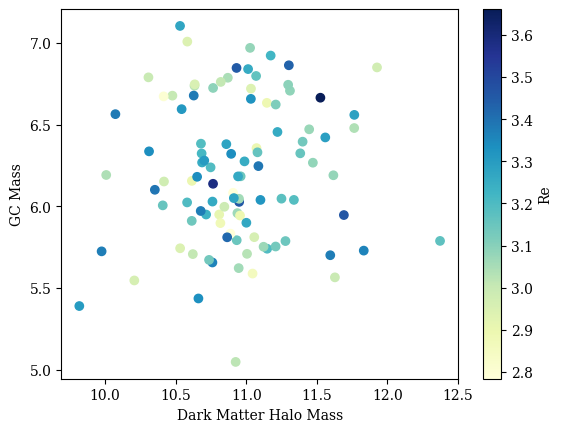

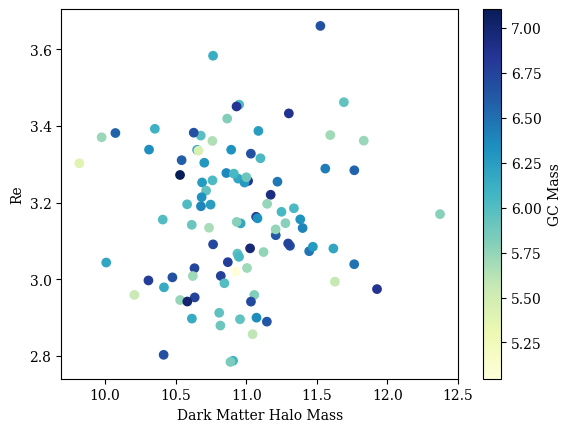

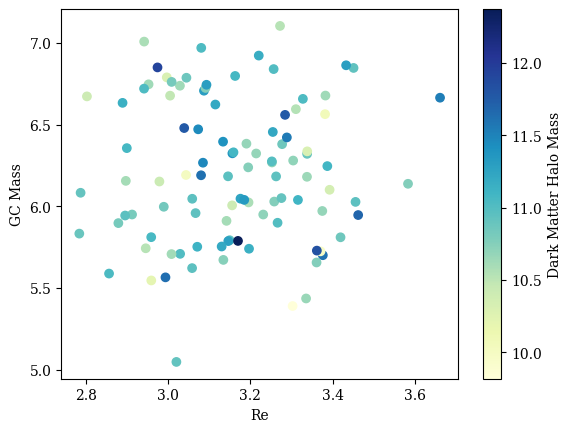

In [251]:
######################################################################
### GRID PLOTS 
######################################################################

logMstellar = 8.5
n = 100

DM_sample = DM_random_sample(logMstellar, n)
Re_sample = Re_random_sample(logMstellar, n)

M_GCstripe, M_Sstripe = GC_stripe_func (M_GC, M_S, lbound, ubound)
GC_sample = GC_random_sample(M_GCstripe, n)

####M DM HALO VS M GC #########
plt.figure()
plt.scatter(DM_sample, GC_sample, c = Re_sample, cmap = 'YlGnBu')
colorbar = plt.colorbar()
colorbar.set_label('Re')
plt.xlabel('Dark Matter Halo Mass')
plt.ylabel('GC Mass')
plt.show

####### M DM HALO VS Re #########
plt.figure()
plt.scatter(DM_sample, Re_sample, c = GC_sample, cmap = 'YlGnBu')
colorbar = plt.colorbar()
colorbar.set_label('GC Mass')
plt.xlabel('Dark Matter Halo Mass')
plt.ylabel('Re')
plt.show


####### Re VS M GC  #########
plt.figure()
plt.scatter(Re_sample, GC_sample, c = DM_sample, cmap = 'YlGnBu')
colorbar = plt.colorbar()
colorbar.set_label('Dark Matter Halo Mass')
plt.xlabel('Re')
plt.ylabel('GC Mass')
plt.show

In [6]:
def behroozi2019_fit(mhalo, alpha=1.959, z=0):

    eps = -1.432
    logM1 = 11.889
    m1 = 10**logM1
    beta = 0.464
    delta = 0.319
    log_gamma = -0.812
    
    x = np.log10(mhalo/m1)
    lg_mstar = logM1 + eps - np.log10(10**(-alpha*x) + 10**(-beta*x)) + 10**log_gamma*np.exp(-0.5*(x/delta)**2)
    
    return 10**lg_mstar

alpha = 2.10 # slope

mhalo = 10**11.20296399
log_mstar_median = np.log10(behroozi2019_fit(mhalo, alpha=alpha))

print(log_mstar_median)

8.99999999125255


In [ ]:
######
### choose a range of stellar masses to isolate a vertical 'stripe from data'
##eg 8-8.25
## 7 - 8.25
## 8.25 - 9
## or nonlinear bins


##########  HISTOGRAM of counts at certain Stellar mass
# # plots M GCs / M stellar counts for specified vertical stripe
# plt.hist(MGCstripe, bins = 10)
# plt.xlabel('log GC Mass')
# plt.xticks(np.arange(min(MGCstripe), max(MGCstripe)+0.1, 0.5))
# plt.ylabel('counts')
# plt.show


##### 
#pick one of thr three panels and do it for different stellar masses
## see what say a population of random patch of sky
# good place to look shanys paper

